In [16]:
import networkx as nx
import numpy as np
import torch

In [6]:
G = nx.Graph()
G.add_nodes_from(range(10))

In [7]:
G.add_edges_from([(1, 2), (1, 3)])

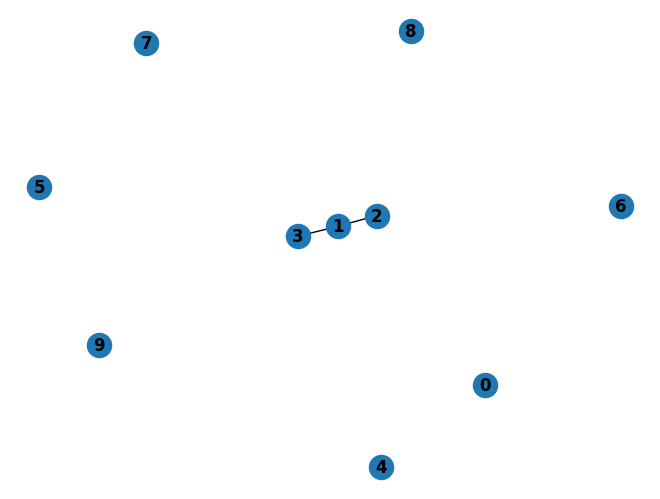

In [9]:
nx.draw(G, with_labels=True, font_weight='bold')

In [17]:
nodes_feature = torch.arange(8).view(1,4,2)

In [19]:
nodes_feature.size()

torch.Size([1, 4, 2])

In [21]:
adj_matrix = torch.tensor([[1,1,0,0],
                          [1,1,1,1],
                          [0,1,1,1],
                          [0,1,1,1]])

In [22]:
adj_matrix.size()

torch.Size([4, 4])

In [23]:
from torch_geometric.nn import GCNConv, SGConv, GATConv

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
